In [2]:
# Test for the estimation of a single image key-points

import argparse
import grpc
import io
import matplotlib.pyplot as plt
import image_generic_pb2
import image_generic_pb2_grpc
import PIL.Image as PIL_image


def process_image(stub, image_path):
    print(f'Processing image: \'{image_path}\'')
    with open(image_path, 'rb') as fp:
        image_bytes = fp.read()
    request = image_generic_pb2.Image(data=image_bytes)
    return stub.process(request)


def display_image(image):
    img = PIL_image.open(io.BytesIO(image.data))
    ax = plt.gca()
    ax.imshow(img)
    plt.show()


def parse_args():
    """
    Parse arguments for test setup

    Returns:
        The arguments for the test
    """
    parser = argparse.ArgumentParser(description='Test for OpenPose gRPC Service')
    parser.add_argument(
        'image',
        help='Path to the image to send to the server')
    parser.add_argument(
        '--target',
        metavar='target',
        default='10.0.14.4:8061',
        help='Location of the tested server (defaults to localhost:8061)')
    return parser.parse_args()



Processing image: 'images/p3_dance.png'


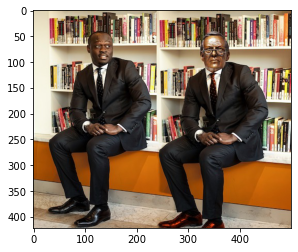

In [8]:
image_path = "images/p3_dance.png"
target = "10.0.14.4:8061"
with grpc.insecure_channel(target) as channel:
    estimator_stub = image_generic_pb2_grpc.ImageGenericServiceStub(channel)
    try:
        response = process_image(estimator_stub, image_path)
        display_image(response)
    except grpc.RpcError as rpc_error:
        print('An error has occurred:')
        print(f'  Error Code: {rpc_error.code()}')
        print(f'  Details: {rpc_error.details()}')


In [2]:
import image_generic_pb2

In [3]:
p=image_generic_pb2.Image

In [4]:
p

image_generic_pb2.Image